In [1]:
#1. Importation des Bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pptx import Presentation
from pptx.util import Inches

In [2]:
#2. Lecture des Données depuis un Fichier Excel

# Lecture des données d'apprentissage
df_train = pd.read_excel('TP_a_Données_Perceptron_Simple.xlsx', sheet_name="Base d'apprentissage S")
X_train = df_train[['Biais', 'Longeur Sépale ', 'Longeur Pétale']].values
y_train = df_train['C'].values

#affichage des colonnes d'entrainement
print(df_train.columns)

# Lecture des données de test
df_test = pd.read_excel('TP_a_Données_Perceptron_Simple.xlsx', sheet_name='Base de tests')
X_test = df_test[['N', 'Longeur Sépale ', 'Longeur Pétale']].values
y_test = df_test['Type De RdN'].values

#affichage des colonnes de test
print(df_test.columns)

# Lecture des données de biais
df_biais = pd.read_excel('TP_a_Données_Perceptron_Simple.xlsx', sheet_name="Base d'apprentissage S")
X_biais = df_biais[['Biais', 'Longeur Sépale ', 'Longeur Pétale']].values


Index(['Biais', 'Longeur Sépale ', 'Longeur Pétale', 'Type de Fleurs', 'C'], dtype='object')
Index(['N', 'Longeur Sépale ', 'Longeur Pétale', 'Type de Fleurs',
       'Type De RdN'],
      dtype='object')


In [3]:
#3. Fonction d'Activation
def fonction_activation(x):
    return 1 if x >= 0 else 0

In [36]:
def perceptron(X, y, learning_rate=0.1, iterations=100):
  # Initialisation des poids à 0
  poids = np.zeros(X.shape[1])
  for _ in range(iterations):
    for i in range(len(X)):
      # Calcul de la sortie
      z = np.dot(poids, X[i]) #produit scalaire
      y_pred = fonction_activation(z)

      # Mise à jour des poids
      poids += learning_rate * (y[i] - y_pred) * X[i]

  return poids


In [43]:
#5. Entraînement du Modèle
poids = perceptron(X_train, y_train)
print(f'Poids entraînés: {poids}')

Poids entraînés: [-0.1  -0.3   0.63]


In [44]:
#6. Prédiction avec les Données de Test
def prediction(X, poids):
    predictions = []
    for i in range(len(X)):
        y_pred = fonction_activation(np.dot(X[i], poids))
        predictions.append(y_pred)
    return predictions

In [45]:
y_pred = prediction(X_test, poids)
print(f'Prédictions: {y_pred}')

Prédictions: [0, 0, 0, 0, 0, 1, 1, 0, 1, 0]


In [40]:
#7. Évaluation du Modèle
accuracy = np.mean(y_pred == y_test)
print(f'Exactitude: {accuracy * 100}%')

Exactitude: 80.0%


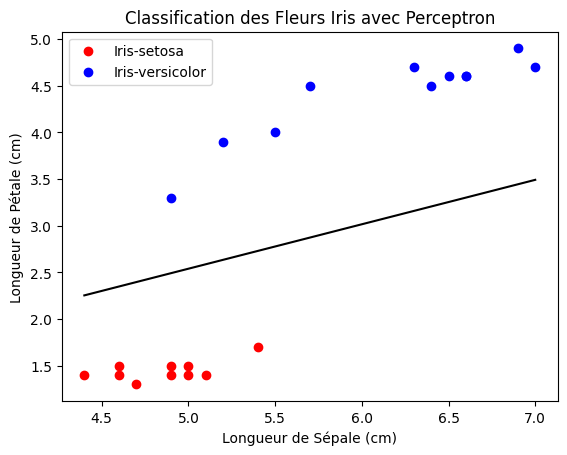

In [41]:
#8. Visualisation des Données et du Séparateur Linéaire
# Extraire les valeurs de longueur de sépale et de pétale
sepal_length = X_train[:, 1]
petal_length = X_train[:, 2]

# Tracer les points de données
plt.scatter(sepal_length[y_train == 0], petal_length[y_train == 0], color='red', label='Iris-setosa')
plt.scatter(sepal_length[y_train == 1], petal_length[y_train == 1], color='blue', label='Iris-versicolor')

# Tracer le séparateur linéaire
x_vals = np.array([min(sepal_length), max(sepal_length)])
y_vals = -(poids[1] * x_vals + poids[0]) / poids[2]
plt.plot(x_vals, y_vals, color='black')

plt.xlabel('Longueur de Sépale (cm)')
plt.ylabel('Longueur de Pétale (cm)')
plt.legend()
plt.title('Classification des Fleurs Iris avec Perceptron')
plt.show()